In [1]:
from drugSite_scrapers3 import drug, review

In [2]:
import sys, pickle
from time import time

import pandas as pd 
from itertools import islice
import re
# from StringIO import StringIO

import numpy as np
import matplotlib.pyplot as plt
import pylab as pl



# from oc_db_fxns import build_oc_station_db, make_arrays, min_max_print, oc_data_2df
# from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline

In [3]:
# from sklearn import cluster, datasets, metrics
# from sklearn.metrics import euclidean_distances
# from sklearn.neighbors import kneighbors_graph
# from sklearn.preprocessing import StandardScaler
# from oc_clustering_fxns import build_cluster_data, test_clustering

from numpy.random import uniform, seed
from matplotlib.mlab import griddata
# from mpl_toolkits.basemap import shiftgrid
from numpy import linspace
from numpy import meshgrid
from mpl_toolkits.axes_grid1 import make_axes_locatable

# from matplotlib.ticker import MaxNLocator
# from mpl_toolkits.basemap import Basemap
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [4]:
from numpy.random import uniform, seed
from matplotlib.mlab import griddata
# import matplotlib.pyplot as plt
# import numpy as np
# from mpl_toolkits.basemap import shiftgrid
# from numpy import linspace
# from numpy import meshgrid
# from mpl_toolkits.axes_grid1 import make_axes_locatable

In [5]:
from sklearn import cluster, datasets, metrics
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans
# from oc_clustering_fxns import build_cluster_data, test_clustering

In [6]:
class drug_dataset:
    
    def __init__(self, _one_drug):
        self.data, self.target = self.filter_set_data(_one_drug)
#         self.target = self.set_target(_one_drug)
        self.target_names = self.set_target_names()
#         self.attributes, self.attributeDetails = self.get_attributeDetails(_one_drug)
        
    def set_data(self, _one_drug):
        _data = []
        for rev in _one_drug.reviews:
            _data.append(rev.comment)
        return _data
           
    def set_target(self, _one_drug):
        _targets = []
        abbrev = 'ddc'
        if abbrev == 'ddc':
            for rev in _one_drug.reviews:
                _targets.append(rev.genRating)
        elif _one_drug.abbrev == 'wmd':
            for rev in _one_drug.reviews:
                _targets.append(rev.satisfaction)
        return _targets
    
    def filter_set_data(self, _one_drug):
        temp_data = self.set_data(_one_drug)
        temp_targets = self.set_target(_one_drug)
        
        data = []
        targets = []
        if len(temp_data) == len(temp_targets):
            for ik in range(len(temp_data)):
                if temp_targets[ik] != None:
                    targets.append(int(temp_targets[ik]))
                    data.append(temp_data[ik])
        else:
            print('help!')
        return data, targets
        
#     def get_attributeDetails(self, _one_drug):
#         attributes = list(_one_drug.reviews[0].__dict__.keys())
#         attributes.remove('comment')

#         attr_opts = {}
#         for attr in attributes: 
#             full_list = [one_drug.reviews[ik].__dict__[attr] for ik in range(len(one_drug.reviews))]
#             attr_opts[attr] = set(full_list)
#         return attributes, attr_opts        

    def set_target_names(self):
        return list(set(self.target))
     

In [7]:
class drug_dataset:
    
    def __init__(self, _one_drug_df):
        self.data, self.target = self.filter_set_data(_one_drug_df)
#         self.target = self.set_target(_one_drug)
        self.target_names = self.set_target_names()
#         self.attributes, self.attributeDetails = self.get_attributeDetails(_one_drug)
        
#     def set_data(self, _one_drug):
#         _data = _one_drug['comment']
#         return _data.tolist()
# #         for rev in _one_drug.reviews:
# #             _data.append(rev.comment)
# #         return _data
           
#     def set_target(self, _one_drug):
#         _targets = []
# #         abbrev = 'ddc'
#         if _one_drug.site == 'ddc':
# #             for rev in _one_drug.reviews:
#             _targets = _one_drug['genRating'].tolist() #.append(rev.genRating)
#         elif _one_drug.site == 'wmd':
#             _targets = _one_drug['satisfaction'].tolist()
# #                 _targets.append(rev.satisfaction)
#         return _targets
    
    def filter_set_data(self, _one_drug_df):
#         _one_drug_df = _one_drug.df
        abbrev = 'ddc'
        if abbrev == 'ddc':
#         if _one_drug.site_abbrev == 'ddc':
            rating = 'genRating'
        elif _one_drug.site == 'wmd':
            rating = 'satisfaction'
            
        df_temp = _one_drug_df[['comment', rating]].dropna(thresh=2)
        data = df_temp['comment'].tolist()
        targets = df_temp[rating].tolist()
#         temp_data = self.set_data(_one_drug)
#         temp_targets = self.set_target(_one_drug)
        
#         data = []
#         targets = []
#         if len(temp_data) == len(temp_targets):
#             for ik in range(len(temp_data)):
#                 if temp_targets[ik] != None:
#                     targets.append(int(temp_targets[ik]))
#                     data.append(temp_data[ik])
#         else:
#             print('help!')
        return data, targets
        
#     def get_attributeDetails(self, _one_drug):
#         attributes = list(_one_drug.reviews[0].__dict__.keys())
#         attributes.remove('comment')

#         attr_opts = {}
#         for attr in attributes: 
#             full_list = [one_drug.reviews[ik].__dict__[attr] for ik in range(len(one_drug.reviews))]
#             attr_opts[attr] = set(full_list)
#         return attributes, attr_opts        

    def set_target_names(self):
        return list(set(self.target))
     

In [7]:
mini_drug_list = pickle.load(open('drug_list_ddc_mini.p', 'rb'))

In [8]:
one_drug = mini_drug_list[0]

In [8]:
small_drug_list = pickle.load(open('drug_list_ddc_pg1.p', 'rb'))

In [9]:
from collections import Counter
c = Counter
generics = {}
listed = []
for drug in small_drug_list:
    if drug.generic in generics:
        generics[drug.generic].append(drug)
    else:
        generics[drug.generic] = [drug]
#     if 'bupropion' in drug.generic:
#         listed.append(drug)
# c(generics)   

In [10]:
merged = []
for drug in generics:
    all_together = generics[drug][0]
    for ik in range(1,len(generics[drug])):
        all_together.reviews = all_together.reviews +generics[drug][ik].reviews
    merged.append(all_together)


In [11]:
generics

{'aripiprazole systemic': [<drugSite_scrapers3.drug at 0x1124cc550>],
 'bupropion systemic': [<drugSite_scrapers3.drug at 0x112389940>,
 'citalopram systemic': [<drugSite_scrapers3.drug at 0x1123663c8>,
 'desvenlafaxine systemic': [<drugSite_scrapers3.drug at 0x1125985c0>],
 'duloxetine systemic': [<drugSite_scrapers3.drug at 0x111e8ce80>,
 'escitalopram systemic': [<drugSite_scrapers3.drug at 0x11230f908>,
 'fluoxetine systemic': [<drugSite_scrapers3.drug at 0x1123439b0>,
 'mirtazapine systemic': [<drugSite_scrapers3.drug at 0x112a47710>],
 'sertraline systemic': [<drugSite_scrapers3.drug at 0x111edd828>,
 'venlafaxine systemic': [<drugSite_scrapers3.drug at 0x11254d278>,
 'vilazodone systemic': [<drugSite_scrapers3.drug at 0x11246bc18>]}

In [12]:
for drug in merged:
    drug.build_df()
    print(drug.generic, len(drug.df), len(drug_dataset(drug.df).data))

duloxetine systemic 950 897
sertraline systemic 1225 1151
escitalopram systemic 1050 985
fluoxetine systemic 750 702
citalopram systemic 825 775
bupropion systemic 1300 1207
aripiprazole systemic 250 237
venlafaxine systemic 1000 947
desvenlafaxine systemic 600 557
mirtazapine systemic 325 302
vilazodone systemic 525 485


In [13]:
one_drug = merged[1]

In [57]:
one_drug.attributes

['drugName',
 'site',
 'condition',
 'reviewDate',
 'userName',
 'ageRange_str',
 'gender',
 'role',
 'medDuration_str',
 'effectiveness',
 'ease_of_use',
 'satisfaction',
 'genRating',
 'upVotes']

In [10]:
one_drug.__dict__.keys()

dict_keys(['name', 'generic', 'url_drug', 'url_drug_revs', 'reviews', 'score', 'num_rev', 'num_rev_pages', 'attributes', 'attributeDetails'])

In [17]:
one_drug.attributeDetails['medDuration_str']

{'[6, 12]', '[120, 300]', '[60, 120]', '[1, 6]', '[0, 1]', '[24, 60]', None}

In [14]:
medDur_d = {}
for subset in one_drug.attributeDetails['medDuration_str']:
    medDur_d[str(subset)] = one_drug.slice_data('medDuration_str', subset)
    print(str(subset), len(medDur_d[str(subset)]))

[60, 120] 18
[120, 300] 22
[0, 1] 141
[24, 60] 44
[1, 6] 159
[6, 12] 66
None 0


In [15]:
frames = [medDur_d['[0, 1]'], medDur_d['[1, 6]'], medDur_d['[6, 12]']]

leq_1year = pd.concat(frames)

In [16]:
leq_1year.describe()

,genRating,upVotes
count,350.000000,366.000000
mean,6.860000,56.819672
std,3.197483,56.462331
min,1.000000,0.000000
25%,4.000000,17.000000
50%,8.000000,35.500000
75%,10.000000,85.750000
max,10.000000,343.000000


In [17]:
dataset = drug_dataset(leq_1year)

In [18]:
len(one_drug.df), len(dataset.data)

(1225, 350)

In [19]:
print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))
print()

labels = dataset.target
true_k = list(set(labels))
print(type(true_k[-1]))
true_k = np.unique(labels).shape[0]

350 documents
10 categories

<class 'float'>


In [20]:
print("Extracting features from the training dataset using a sparse vectorizer")
t0 = time()
vectorizer = TfidfVectorizer(max_df=0.5, max_features=3000,
                                 min_df=2, stop_words='english')

Extracting features from the training dataset using a sparse vectorizer


In [21]:
X = vectorizer.fit_transform(dataset.data)

In [22]:
print("done in %fs" % (time() - t0))
print("n_samples: %d, n_features: %d" % X.shape)
print()

done in 1.228322s
n_samples: 350, n_features: 1562



In [23]:
n_components = 100

In [24]:
if n_components:
    print("Performing dimensionality reduction using LSA")
    t0 = time()
    # Vectorizer results are normalized, which makes KMeans behave as
    # spherical k-means for better results. Since LSA/SVD results are
    # not normalized, we have to redo the normalization.
    svd = TruncatedSVD(n_components)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(svd, normalizer)

    X = lsa.fit_transform(X)

    print("done in %fs" % (time() - t0))

    explained_variance = svd.explained_variance_ratio_.sum()
    print("Explained variance of the SVD step: {}%".format(
        int(explained_variance * 100)))

    print()

Performing dimensionality reduction using LSA
done in 0.161243s
Explained variance of the SVD step: 68%



In [25]:
km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', n_init=1,
                         init_size=1000, batch_size=1000)#, verbose=opts.verbose)

print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)
print("done in %0.3fs" % (time() - t0))
print()

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))


print()

Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=1000, max_iter=100, max_no_improvement=10, n_clusters=10,
        n_init=1, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)
done in 0.059s

Homogeneity: 0.119
Completeness: 0.121
V-measure: 0.120
Adjusted Rand-Index: 0.022
Silhouette Coefficient: 0.021



In [26]:
if hasattr(km, 'labels_'):
                y_pred = km.labels_.astype(np.int)
else:
                y_pred = km.predict(X)

y_true = labels

In [27]:
def non_picks(pick_id):
    ids = [ik for ik in range(10)]
    ids.remove(pick_id)
    return ids

In [28]:
y_pred = [pred-1 for pred in y_pred]
print(set(y_pred))

{0, 1, 2, 3, 4, 5, 6, 7, 8, -1}


In [29]:
def filter_count_scores(pick, _y_pred, _y_true):
    filtered_pred = []
    filtered_true = []
    for ik, score in enumerate(_y_pred):
        if score == pick:
            filtered_pred.append(_y_pred[ik])
            filtered_true.append(_y_true[ik])
            
    c = Counter(filtered_true)
    counts_ls = []
    for ik in np.arange(1,11):
        if ik in c.keys():
            counts_ls.append(c[ik])
        else:
            counts_ls.append(0)
    return counts_ls

In [30]:

from collections import Counter

def get_counts(preds):
    c = Counter(preds)
    counts_ls = []
    for ik in range(10):
        counts_ls.append(c[ik])
    return counts_ls


In [31]:
# x, y, feat_data, basemap, xLab, yLab, latLon_params = amassData(df3_sub, in_var_names, sliceType, depth = Depth)
N_CLUSTERS = 10

# preds_dict, cluster_fig_SPO = test_clustering2( x, y, feat_data, xLab, yLab, N_CLUSTERS, latLon_params, Map = basemap)

In [32]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from matplotlib import gridspec

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

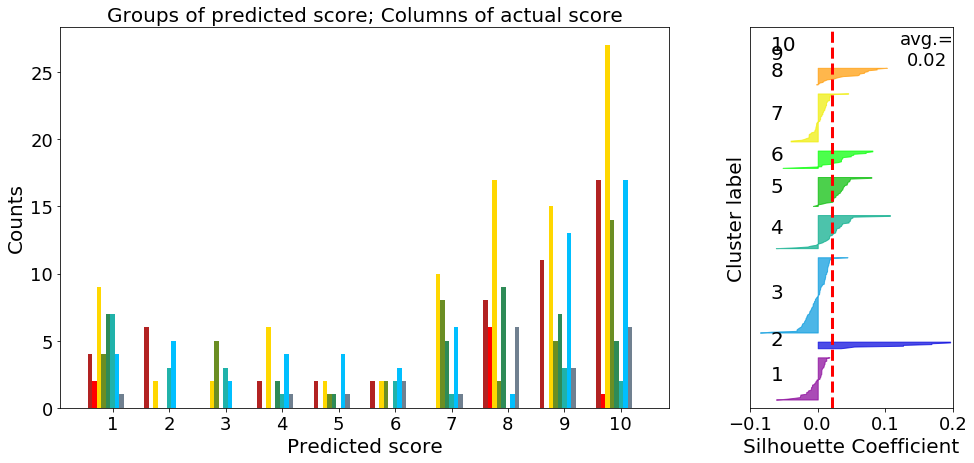

In [33]:
figSize = (16, 7)
title_sz = 27
axis_sz = 20
tick_sz = 18
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=figSize, facecolor='w')
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])

score = metrics.silhouette_score(X, y_pred, metric='euclidean')

ax2 = plt.subplot(gs[1])
ax2.set_xlim([-0.1, .2])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax2.set_ylim([0, len(X) + (N_CLUSTERS + 1) * 10])

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, y_pred)

y_lower = 10
y_pred = np.array(y_pred)

for i in range(1,1+N_CLUSTERS):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[y_pred == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.spectral(float(i) / N_CLUSTERS)
    ax2.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax2.text(-0.07, y_lower + 0.45 * size_cluster_i, str(i), size=axis_sz)

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax2.text(.87, .90,'avg.=\n'+ '%.2f' % score, size=tick_sz, transform=plt.gca().transAxes,
    horizontalalignment='center')

#ax2.set_title("The silhouette plot for the various clusters.")
ax2.set_xlabel("Silhouette Coefficient", fontsize=axis_sz)
ax2.set_ylabel("Cluster label",fontsize=axis_sz)

# The vertical line for average silhoutte score of all the values
ax2.axvline(x=score, color="red", linestyle="--", linewidth=3)

ax2.set_yticks([])  # Clear the yaxis labels / ticks
#ax2.set_xticks([ 0, .3, .6, .9])

xtickNames = ax2.get_xticklabels()
ytickNames = ax2.get_yticklabels()

plt.setp(ytickNames, rotation=0, fontsize=tick_sz)
plt.setp(xtickNames, rotation=0, fontsize=tick_sz)


ax1 = plt.subplot(gs[0])
N = 10
ind = np.arange(1,11)  # the x locations for the groups
width = 0.08       # the width of the bars
colors = ['firebrick', 'red', 'gold', 'olivedrab', 'seagreen', 'lightseagreen', 'deepskyblue', 'slategray', 'navy', 'mediumpurple']

for score in np.arange(1,11):
    cts = filter_count_scores(score, y_pred, y_true)
    rects = ax1.bar((ind-5*width)+(score-1)*width, cts, width, color=colors[score-1])

plt.xticks([ik-.15*5 for ik in np.arange(1,11)],  np.arange(1,11), rotation='vertical')
plt.xticks([ik for ik in np.arange(1,11)], np.arange(1,11), rotation='vertical')

ax1.set_xlabel('Predicted score', fontsize=axis_sz)
ax1.set_ylabel('Counts', fontsize=axis_sz)

plt.title('Groups of predicted score; Columns of actual score', fontsize=axis_sz) 

xtickNames = ax1.get_xticklabels()
ytickNames = ax1.get_yticklabels()

plt.setp(ytickNames, rotation=0, fontsize=tick_sz)
plt.setp(xtickNames, rotation=0, fontsize=tick_sz)

In [81]:
ith_cluster_silhouette_values = sample_silhouette_values[np.array(y_pred) == 1]
ith_cluster_silhouette_values

array([-0.00475928,  0.01687339,  0.04554235,  0.02843631,  0.00801759,
        0.04196029,  0.01327778, -0.00085529,  0.02208712,  0.04523526,
        0.03174943,  0.04907269,  0.01032974,  0.03938316,  0.00119685,
        0.05088261,  0.02093159,  0.04881239,  0.03191275, -0.00360057,
        0.03760117,  0.05453996,  0.03240447,  0.04003465,  0.01921228,
        0.0832842 ,  0.04206405,  0.04027504,  0.00965791,  0.0378114 ,
       -0.00360057,  0.03240447,  0.04003465,  0.04027504, -0.00430439,
        0.03999815,  0.02318799,  0.10259215,  0.02849029,  0.00851325,
        0.00851325])

Text(0.5,1,'groups of predicted score, columns of actual score')

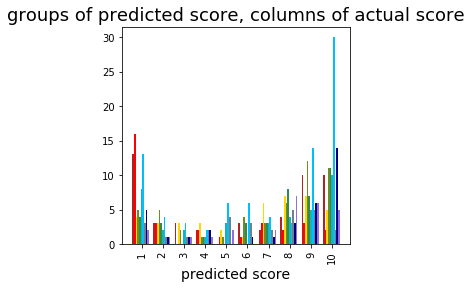

In [262]:

# fig, ax1 = plt.subplots(figsize = (22, 4), facecolor='w')

ax1 = plt.subplot(gs[0])
N = 10
ind = np.arange(1,11)  # the x locations for the groups
width = 0.08       # the width of the bars
colors = ['firebrick', 'red', 'gold', 'olivedrab', 'seagreen', 'lightseagreen', 'deepskyblue', 'slategray', 'navy', 'mediumpurple']

for score in np.arange(1,11):
    cts = filter_count_scores(score, y_pred, y_true)
    rects = ax1.bar((ind-5*width)+(score-1)*width, cts, width, color=colors[score-1])

plt.xticks([ik-.15*5 for ik in np.arange(1,11)],  np.arange(1,11), rotation='vertical')
plt.xticks([ik for ik in np.arange(1,11)], np.arange(1,11), rotation='vertical')

ax1.set_xlabel('predicted score', fontsize=14)
plt.title('groups of predicted score, columns of actual score', fontsize=18)      # ncol=4,  borderaxespad=0.,prop={'size':14-2})


In [ ]:
#with silhouette plot

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from matplotlib import gridspec

def test_clustering_wSil(_x, _y, _data, _xLab, _yLab, N_CLUSTERS, _latLon_params, **kwargs):
    pred_dict = {}
    np.random.seed(0)

    colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
    colors = np.hstack([colors] * 20)
    
    plot_num = 1
    for i_dataset, dataset in enumerate([_data]):
        X = dataset
        # normalize dataset for easier parameter selection
        X = StandardScaler().fit_transform(X)

        # estimate bandwidth for mean shift
        bandwidth = cluster.estimate_bandwidth(X, quantile=0.3)

        # connectivity matrix for structured Ward
        connectivity = kneighbors_graph(X, n_neighbors=10)
        # make connectivity symmetric
        connectivity = 0.5 * (connectivity + connectivity.T)

        # Compute distances
        distances = euclidean_distances(X)

        # create clustering estimators
        ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
        two_means = cluster.MiniBatchKMeans(n_clusters=N_CLUSTERS)
        ward = cluster.AgglomerativeClustering(n_clusters=N_CLUSTERS,
                        linkage='ward', connectivity=connectivity)
        spectral = cluster.SpectralClustering(n_clusters=N_CLUSTERS,
                                              eigen_solver='arpack',
                                              affinity="nearest_neighbors")
        dbscan = cluster.DBSCAN(eps=.2)
        affinity_propagation = cluster.AffinityPropagation(damping=.9,
                                                           preference=-200)

        average_linkage = cluster.AgglomerativeClustering(linkage="average",
                                affinity="cityblock", n_clusters=N_CLUSTERS,
                                connectivity=connectivity)
        #brc = cluster.Birch(threshold = .5, branching_factor = 50, n_clusters = N_CLUSTERS)
        
        alg_list = [('MiniBatchKMeans', two_means)]#,
                    #('Birch', brc)]
                    #('DBSCAN', dbscan),
                    #('AffinityPropagation', affinity_propagation)]
                    #('MeanShift', ms)]
                    #,
                    #('SpectralClustering', spectral),
                    #('Ward', ward)]:
                    #('AgglomerativeClustering', average_linkage),
                    #('DBSCAN', dbscan)
                    #]:
        if kwargs['Map']:
            figSize = (14, 10)
        else:
            figSize = (16, 7)
        fig, (ax1, ax2) = plt.subplots(nrows=len(alg_list), ncols=2, figsize=figSize, facecolor='w')
        gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
        for name, algorithm in alg_list:
            # predict cluster memberships
            t0 = time.time()
            algorithm.fit(X)
            t1 = time.time()
            if hasattr(algorithm, 'labels_'):
                y_pred = algorithm.labels_.astype(np.int)
            else:
                y_pred = algorithm.predict(X)

            score = metrics.silhouette_score(X, y_pred, metric='euclidean')
            
            ax2 = plt.subplot(gs[1])
            ax2.set_xlim([-0.1, 1])
            # The (n_clusters+1)*10 is for inserting blank space between silhouette
            # plots of individual clusters, to demarcate them clearly.
            ax2.set_ylim([0, len(X) + (N_CLUSTERS + 1) * 10])

            # Compute the silhouette scores for each sample
            sample_silhouette_values = silhouette_samples(X, y_pred)

            y_lower = 10
            for i in range(N_CLUSTERS):
                # Aggregate the silhouette scores for samples belonging to
                # cluster i, and sort them
                ith_cluster_silhouette_values = \
                    sample_silhouette_values[y_pred == i]

                ith_cluster_silhouette_values.sort()

                size_cluster_i = ith_cluster_silhouette_values.shape[0]
                y_upper = y_lower + size_cluster_i

                color = cm.spectral(float(i) / N_CLUSTERS)
                ax2.fill_betweenx(np.arange(y_lower, y_upper),
                                  0, ith_cluster_silhouette_values,
                                  facecolor=color, edgecolor=color, alpha=0.7)

                # Label the silhouette plots with their cluster numbers at the middle
                ax2.text(-0.07, y_lower + 0.45 * size_cluster_i, str(i), size=axis_sz)

                # Compute the new y_lower for next plot
                y_lower = y_upper + 10  # 10 for the 0 samples
            
            ax2.text(.87, .90,'avg.=\n'+ '%.2f' % score, size=tick_sz, transform=plt.gca().transAxes,
                horizontalalignment='center')
            
            #ax2.set_title("The silhouette plot for the various clusters.")
            ax2.set_xlabel("Silhouette Coefficient", fontsize=axis_sz)
            ax2.set_ylabel("Cluster label",fontsize=axis_sz)

            # The vertical line for average silhoutte score of all the values
            ax2.axvline(x=score, color="red", linestyle="--", linewidth=3)

            ax2.set_yticks([])  # Clear the yaxis labels / ticks
            ax2.set_xticks([ 0, .3, .6, .9])

            xtickNames = ax2.get_xticklabels()
            ytickNames = ax2.get_yticklabels()

            plt.setp(ytickNames, rotation=0, fontsize=tick_sz)
            plt.setp(xtickNames, rotation=0, fontsize=tick_sz)
            
            # plot
            _colors = cm.spectral(y_pred.astype(float) / N_CLUSTERS)
            #_colors = colors[y_pred].tolist()
            #color_preds = [_colors[ik]+'o' for ik in xrange(len(_colors))]
            
            if kwargs['Map']:
                ax1 = plt.subplot(gs[0])
                #ax1 = plt.subplot(1, len(alg_list), 1)
                
                _basemap = kwargs['Map']
                _basemap.ax = ax1
                _basemap.drawcoastlines(color='k')
                _basemap.drawcountries()
                _basemap.fillcontinents(lake_color='b',color = 'gray')
                _basemap.drawmapboundary(linewidth=3)
                _basemap.drawmeridians(np.arange(0, 360, 30))
                _basemap.drawparallels(np.arange(-90, 90, 30))

                x,y = _basemap(_x, _y)
                #for im in xrange(len(x)):
                #    _basemap.plot(x[im], y[im], color = _colors[im], marker = 'o', markersize=5, alpha = .3)    
                _basemap.scatter(x, y, c = _colors, marker = 'o', s=30, alpha = .2)
                #pred_dict[name] = [_x, _y, colors[y_pred].tolist()] 
                #x_tics_loc = 
                #ax1.set_xticks([-30, 0, 30, 60])
                #ax1.set_yticks([-60, -30, 0, 30])
                
            # build plot here of as per discussion on Saturday
            else:
                
#                 fig, ax1 = plt.subplots(figsize = (22, 4), facecolor='w')

                N = 10
                ind = np.arange(1,11)  # the x locations for the groups
                width = 0.08       # the width of the bars
                colors = ['firebrick', 'red', 'gold', 'olivedrab', 'seagreen', 'lightseagreen', 'deepskyblue', 'slategray', 'navy', 'mediumpurple']

                for score in np.arange(1,11):
                    cts = filter_count_scores(score, y_pred, y_true)
                    rects = ax1.bar((ind-5*width)+(score-1)*width, cts, width, color=colors[score-1])

                plt.xticks([ik-.15*5 for ik in np.arange(1,11)],  np.arange(1,11), rotation='vertical')
                plt.xticks([ik for ik in np.arange(1,11)], np.arange(1,11), rotation='vertical')

                ax1.set_xlabel('predicted score', fontsize=14)
                plt.title('groups of predicted score, columns of actual score', fontsize=18) 
                
                
                ax1.set_xlim(min(_x), max(_x))
                ax1.set_ylim(min(_y)-100, max(_y)+200)
#                 ax1.invert_yaxis()
                
#                 axin = inset_axes(ax1, width="35%", height="35%", loc=4)
#                 inmap = Basemap(projection='ortho', lon_0=np.mean(_latLon_params[0]), lat_0=0,
#                     ax=axin, anchor='NE')
#                 inmap.fillcontinents()
#                 inmap.drawcoastlines(color='k')
#                 inmap.plot(_latLon_params[0], _latLon_params[1], '-k', linewidth=2 , latlon=True)  

                # set tick size
                xtickNames = ax1.get_xticklabels()
                ytickNames = ax1.get_yticklabels()

                plt.setp(ytickNames, rotation=0, fontsize=tick_sz)
                plt.setp(xtickNames, rotation=0, fontsize=tick_sz)
                
            # label axes    
            ax1.set_ylabel(_yLab, fontsize=axis_sz)
            ax1.set_xlabel(_xLab, fontsize=axis_sz)
            
            # title with model name and score
            if i_dataset == 0:
                ax1.set_title(name, size=title_sz)
            
            # algorithm fit time in bottome right corner
            ax1.text(.99, .01,('%.2fs' % (t1 - t0)).lstrip('0'), transform=plt.gca().transAxes, size=12,
                horizontalalignment='right')
            
            plot_num += 1   
            
    plt.tight_layout(pad=0.4, w_pad=1., h_pad=1.)    
    plt.show()
    return pred_dict, fig    
